# Illustrate our Synthetic NMR Pattern Generator
We build patterns by gradually building up from single peaks, to single peaks, to intersecting groups peaks.

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from nmrtrack import synthetic
import numpy as np

## Making a Single Peak
We use Lorentz functions to describe the shape of an NMR peak. The utilities with `nmrtrack` create a function which returns the predicted intensity of the peak as a function of offset. 

In [2]:
peak_fun = synthetic.generate_peak(center=0, area=1, width=0.01)

Text(0.5, 0, '$\\delta$')

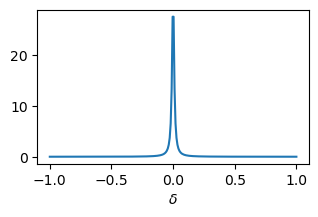

In [3]:
fig, ax = plt.subplots(figsize=(3.5, 2.))

x = np.linspace(-1, 1, 256)

ax.plot(x, peak_fun(x))
ax.set_xlabel('$\delta$')

## Making a Multiplets
NMR peaks split in a hierarchical patterns. Peaks split split into subpeaks which can again split.

Make a complex peak by listing the number of splits and distance between subpeaks at each level.

In [4]:
doublet = synthetic.generate_peak(-0.2, 1, 0.01, multiplicity=[2], coupling_offsets=[0.05])

In [5]:
quadruplet = synthetic.generate_peak(0, 1, 0.01, multiplicity=[4], coupling_offsets=[0.05])

In [6]:
triplet_of_doublets = synthetic.generate_peak(0.2, 1, 0.005, multiplicity=[3, 2], coupling_offsets=[0.05, 0.02])

Text(0.5, 0, '$\\delta$')

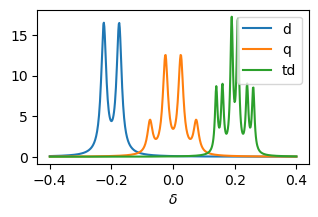

In [7]:
fig, ax = plt.subplots(figsize=(3.5, 2.))

x = np.linspace(-0.4, 0.4, 512)
ax.plot(x, doublet(x), label='d')
ax.plot(x, quadruplet(x), label='q')
ax.plot(x, triplet_of_doublets(x), label='td')

ax.legend()

ax.set_xlabel('$\delta$')

## Combining Peaks
Combine peaks by providing a list of individual peaks to the `combine_peaks` function.

In [10]:
pattern = synthetic.combine_peaks([doublet, quadruplet, triplet_of_doublets])

Text(0.5, 0, '$\\delta$')

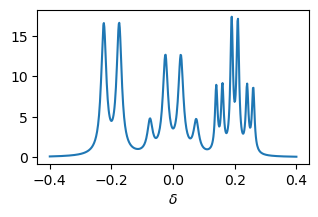

In [11]:
fig, ax = plt.subplots(figsize=(3.5, 2.))

x = np.linspace(-0.4, 0.4, 512)
ax.plot(x, pattern(x), label='d')

ax.set_xlabel('$\delta$')